# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [173]:
import pandas as pd 
import numpy as np

demo = pd.read_csv('demo01.csv')

demo.info
demo.shape

cont = demo['mau'].value_counts()
bom = cont.values[0]
mau = cont.values[1]

total = bom + mau
total

db1= (mau / total) * 100
db2= (bom/ total) * 100
print("mau=",db1,
      "bom=",db2)

#16650 rows × 16 columns

mau= 2.3423423423423424 bom= 97.65765765765767


# Ou seja, em média a cada 50 pessoas 1 é ruim.

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [163]:

novo_df = []
for col in demo.columns:
    numero_cat = demo[col].nunique()
    novo_df.append(numero_cat)
    


newdf = pd.DataFrame({
    "variavel" : demo.columns,
    "qtd de vari": novo_df})

    
newdf.head(10)   


,variavel,qtd de vari
0,sexo,2
1,posse_de_veiculo,2
2,posse_de_imovel,2
3,qtd_filhos,8
4,tipo_renda,5
5,educacao,5
6,estado_civil,5
7,tipo_residencia,6
8,idade,5298
9,tempo_emprego,3005


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [277]:


demod1= demo.drop(columns=['tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

demod1.sexo.unique()

demod1.sexo = demod1.sexo.map({'M': 1, 'F':0})
demod1.posse_de_veiculo = demod1.posse_de_veiculo.map({'Y': 1, 'N':0})
demod1.posse_de_imovel = demod1.posse_de_imovel.map({'Y': 1, 'N':0})
# dumm = sexo, posse_de_veiculo posse_de_imovel

#jogar fora =  tipo_renda educacao estado_civil tipo_residencia

demod1.head()
#demod1['mau'].unique()


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,1,1,1,0,58.832877,3.106849,1,0,0,0,2.0,False
1,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
2,0,0,1,0,52.356164,8.358904,1,0,1,1,1.0,False
3,1,1,1,0,46.224658,2.106849,1,1,1,1,2.0,False
4,0,1,0,0,29.230137,3.021918,1,0,0,0,2.0,False


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [229]:
tabelacrus = pd.crosstab(demod1['possui_email'], ['posse_de_veiculo'])
tabelabos = pd.crosstab(demod1['possui_email'],['mau'])
tabelabot = pd.crosstab(demod1['posse_de_veiculo'],['mau'])

print(tabelabos)
print(tabelabot)



col_0           mau
possui_email       
0             15170
1              1480
col_0               mau
posse_de_veiculo       
0                 10178
1                  6472


# A variavel mais poderosa é a "possui_email"

#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [232]:

demod1.to_csv('demod1.csv', index=False)


# ARVORES DE CLASSIFICAÇAO COM UMA VARIAVEL FLAG

In [313]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier


In [355]:

clf = DecisionTreeClassifier(random_state=100,max_depth=10)
clf

DecisionTreeClassifier(max_depth=10, random_state=100)

In [408]:
#demod1.head()
#x= demod1[['posse_de_veiculo',]]
#i=demod1[['posse_de_imovel']]

X = demod1.drop(columns=['mau'])
y = demod1[['mau']].to_numpy()
clf = clf.fit(X, y)



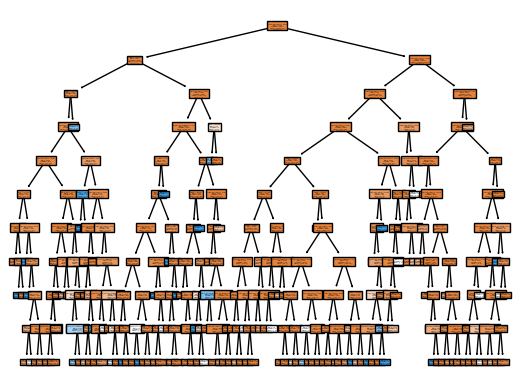

<Figure size 2500x1000 with 0 Axes>

In [410]:

plot_tree(clf,filled=True, class_names=['bom', 'mau'], feature_names= X.columns);
plt.figure(figsize=(25,10))
plt.savefig('arvore_decisao.png', format='png', bbox_inches='tight', dpi=300)


In [411]:
plt.savefig('arvore_decisa23.png', format='png', bbox_inches='tight', dpi=800)

<Figure size 640x480 with 0 Axes>

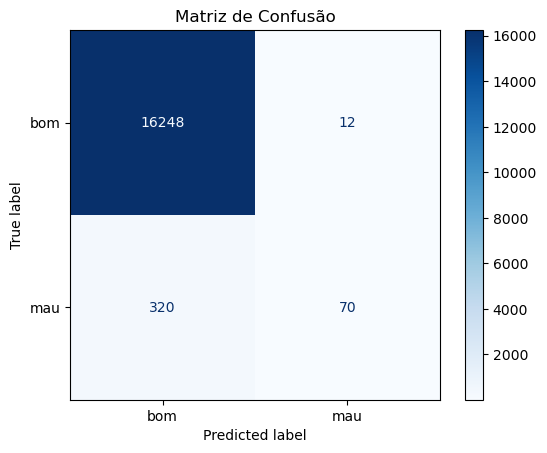

In [412]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf.predict(X)

# Criar a matriz de confusão
cm = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bom', 'mau'])
#disp.plot(cmap=plt.cm.Blues)  # Você pode escolher a coloração
#plt.title("Matriz de Confusão")
plt.show()

In [413]:

#tot= 16248+70+12+320
#acu = (16248 + 70)/ tot
print(acu)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.9800600600600601


0.9800600600600601

In [443]:
#a sequencia é treino depois teste e sempre x depois y
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split( X, y, test_size=0.3, random_state=100)

In [445]:
clf = DecisionTreeClassifier(random_state=100,max_depth=10)
clf
predi = clf.fit(x_test, y_test)
y_chap = clf.predict(x_test)
y_chap

array([False, False, False, ..., False, False, False])

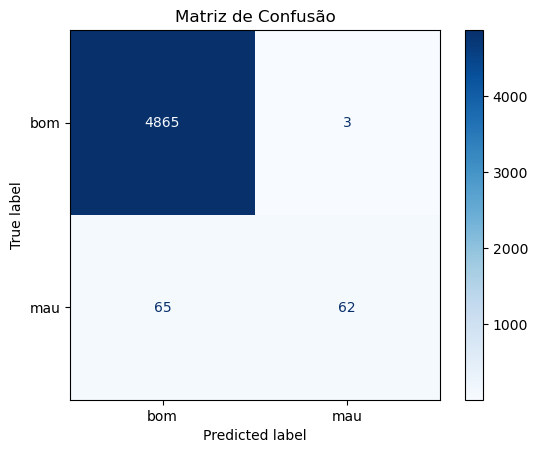

<bound method ConfusionMatrixDisplay.plot of <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001EDAC6C1A30>>

In [451]:

# Criar a matriz de confusão
cmt = confusion_matrix(y_test, y_chap)

disp = ConfusionMatrixDisplay(confusion_matrix=cmt, display_labels=['bom', 'mau'])

disp.plot(cmap=plt.cm.Blues)  # Escolha um colormap que você goste
plt.title('Matriz de Confusão')  # Adiciona um título ao gráfico
plt.show() 
disp.plot